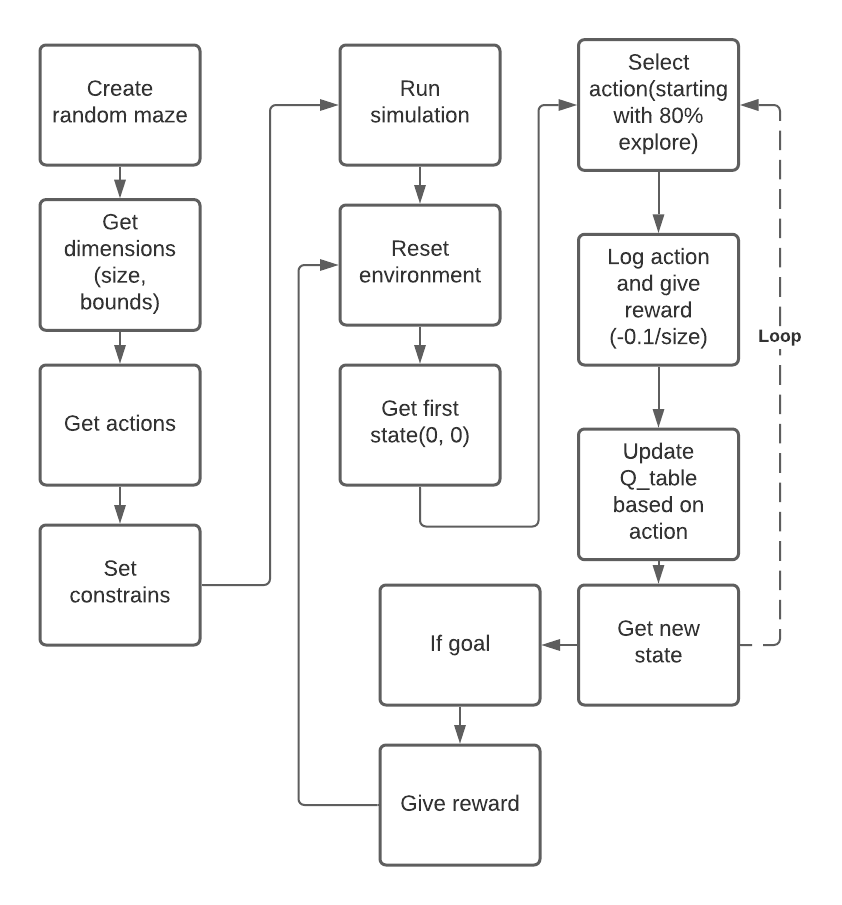

In [4]:
import sys
import numpy as np
import math
import random

import gym
import gym_maze


def simulate():

    # Init learning and explore parameters
    learning_rate = learn(0)
    explore_rate = explore(0)
    discount_factor = 0.99

    streak = 0

    # Render the maze
    env.render()

    # Loop for number of episodes
    for episode in range(episodes):

        # Reset the environment
        obsv = env.reset()

        # Initial state
        state_0 = state_bucket(obsv)
        reward_sum = 0

        # Loop max steps
        for t in range(max_steps):

            # Select next action and execute
            action = next_action(state_0, explore_rate)
            obsv, reward, done, _ = env.step(action)

            # Log the action
            state = state_bucket(obsv)
            reward_sum += reward

            # Update Q based on the action
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            # Setup next state
            state_0 = state


            env.render()

            if env.is_game_over():
                sys.exit()

            if done:
                print(f"Episode: {episode}, steps: {t}, reward: {reward_sum}, streak: {streak}.")
                plot_info.append(reward_sum)
                
                if t <= solved_steps:
                    streak += 1
                else:
                    streak = 0
                break

            elif t >= max_steps - 1:
                print(f"Reached max steps {max_steps}")

        # Done when same result is reached n amount of times
        if streak > max_streak:
            break

        # Update explore and learn
        explore_rate = explore(episode)
        learning_rate = learn(episode)


def next_action(state, explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action


def explore(t):
    # return explore either min_explore or minimum of 0.8 or 1-logimatric of episode+1 / decay
    # after 15 episodes the explore goes down all the way to 0.001
    return max(min_explore, min(0.8, 1.0 - math.log10((t+1)/decay)))


def learn(t):
    # return max amount of either min learn or minimum of 0.8 or 1-logimatric of episode+1 / decay
    # after 15 episodes the learn rate goes down - all the way to the min_learn(0.2)
    return max(min_learn, min(0.8, 1.0 - math.log10((t+1)/decay)))


def state_bucket(state):
    bucket = []
    # Loop state[0 0] at start
    for i in range(len(state)):
        if state[i] <= bounds[i][0]:
            bucket_i = 0
        elif state[i] >= bounds[i][1]:
            bucket_i = buckets[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = bounds[i][1] - bounds[i][0]
            offset = (buckets[i]-1)*bounds[i][0]/bound_width
            scaling = (buckets[i]-1)/bound_width
            bucket_i = int(round(scaling*state[i] - offset))
        bucket.append(bucket_i)
    return tuple(bucket)


if __name__ == "__main__":

    # Create maze, here using a 10x10 random maze
    env = gym.make("maze-random-10x10-v0")

    plot_info = []

    # Environment costrains
    # Get the size of the maze
    size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
    buckets = size  # one bucket per grid

    # Get number of actions, return Up, Down, Left, Right
    actions = env.action_space.n  
    # Get bounds for space
    bounds = list(zip(env.observation_space.low, env.observation_space.high))

    # Learning constrains
    min_explore = 0.001
    min_learn = 0.2

    decay = np.prod(size, dtype=float) / 10.0
    
    # Constrains for simulation
    episodes = 5000
    max_steps = np.prod(size, dtype=int) * 100
    max_streak = 100
    solved_steps = np.prod(size, dtype=int)

    # Create Q-table for each state and action
    q_table = np.zeros(buckets + (actions,), dtype=float)


    # Run simulation
    simulate()


Episode: 0, steps: 1559, reward: -0.5589999999999391, streak: 0.
Episode: 1, steps: 5319, reward: -4.319000000000111, streak: 0.
Episode: 2, steps: 680, reward: 0.3199999999999995, streak: 0.
Episode: 3, steps: 312, reward: 0.6879999999999997, streak: 0.
Episode: 4, steps: 962, reward: 0.03799999999999926, streak: 0.
Episode: 5, steps: 584, reward: 0.4159999999999996, streak: 0.
Episode: 6, steps: 2423, reward: -1.4229999999998442, streak: 0.
Episode: 7, steps: 811, reward: 0.1889999999999994, streak: 0.
Episode: 8, steps: 620, reward: 0.37999999999999956, streak: 0.
Episode: 9, steps: 195, reward: 0.8049999999999998, streak: 0.
Episode: 10, steps: 120, reward: 0.8799999999999999, streak: 0.
Episode: 11, steps: 2039, reward: -1.0389999999998865, streak: 0.
Episode: 12, steps: 569, reward: 0.4309999999999996, streak: 0.
Episode: 13, steps: 272, reward: 0.7279999999999998, streak: 0.
Episode: 14, steps: 1701, reward: -0.7009999999999235, streak: 0.
Episode: 15, steps: 184, reward: 0.8159

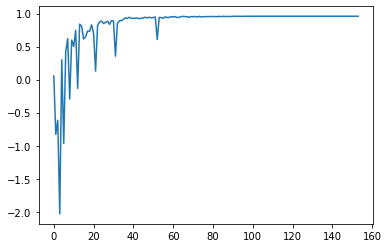

In [4]:
import matplotlib.pyplot as plt


plt.plot(plot_info)